In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
data_kdrama= pd.read_csv('mydramalist.csv')
data_kdrama= data_kdrama[['country']]
data_kdrama['country']= data_kdrama['country'].str.strip()

In [3]:
data_kdrama.isna().sum()

country    0
dtype: int64

array([<AxesSubplot:ylabel='Sum'>], dtype=object)

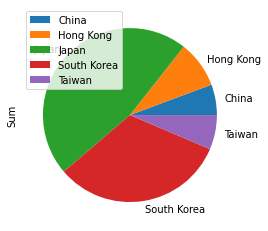

In [4]:
data_kdrama['Sum']= 1
data_kdrama.groupby('country').sum().plot(kind='pie', subplots=True)

In [5]:
data_kdrama

,country,Sum
0,Japan,1
1,Japan,1
2,Japan,1
3,South Korea,1
4,South Korea,1
...,...,...
558,China,1
559,China,1
560,South Korea,1
561,Japan,1


In [6]:
data_kdrama.head(50)

,country,Sum
0,Japan,1
1,Japan,1
2,Japan,1
3,South Korea,1
4,South Korea,1
5,South Korea,1
6,South Korea,1
7,South Korea,1
8,South Korea,1
9,Japan,1


In [7]:
# Cara susah
x= data_kdrama
ct= ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x= pd.DataFrame(ct.fit_transform(x))[:].astype('int')

# Nda tau kenapa begini V V V
x= x.iloc[:, 0:-1]

In [8]:
list_nama_kolom= ['Japan', 'South Korea', 'Hong Kong', 'Taiwan', 'China']
x.columns= list_nama_kolom
x

,Japan,South Korea,Hong Kong,Taiwan,China
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
558,1,0,0,0,0
559,1,0,0,0,0
560,0,0,0,1,0
561,0,0,1,0,0


### Nama-nama fitur di atas salah, karena column transform akan mengsort berdasarkan huruf pertama secara automatis, maka kita perlu mengubahnya

In [9]:
list_nama_kolom= sorted(list_nama_kolom)
x.columns= list_nama_kolom
x

,China,Hong Kong,Japan,South Korea,Taiwan
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
558,1,0,0,0,0
559,1,0,0,0,0
560,0,0,0,1,0
561,0,0,1,0,0


### Nah ini baru benar

array([<AxesSubplot:ylabel='None'>], dtype=object)

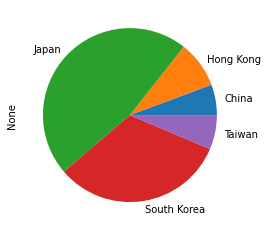

In [10]:
x.sum().plot(kind='pie', subplots=True)

In [11]:
x.columns

Index(['China', 'Hong Kong', 'Japan', 'South Korea', 'Taiwan'], dtype='object')